# UBER DATASET ANALYSIS

In [2]:
#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,datetime,timedelta
d=pd.read_csv(r"C:\Users\NAIB\Downloads\Uber Request Data.csv")#defining dataframe

d.head()#showing 5 rows of dataframe

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
d.tail() #showing last 5 rows of dataframe

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [4]:
d.shape #gives shape of dataframe

(6745, 6)

In [5]:
d.info() #provides information about attributes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
d.describe() # describing the data

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [6]:
d.isnull().sum() #checking null values

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
d.duplicated().sum() # checking duplicate values

0

In [8]:
#changing attribute type to datatime

d['Request timestamp']=pd.to_datetime(d['Request timestamp'],dayfirst=True) 
d['Drop timestamp']=pd.to_datetime(d['Drop timestamp'],dayfirst=True)

In [9]:
d.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [10]:
d['Request timestamp'].value_counts() #viewing all values in that attribute 

2016-07-11 19:02:00    6
2016-07-11 17:57:00    6
2016-07-11 08:37:00    6
2016-07-11 09:40:00    6
2016-07-12 21:42:00    5
                      ..
2016-07-15 18:08:33    1
2016-07-15 04:50:54    1
2016-07-14 18:42:23    1
2016-07-13 19:26:50    1
2016-07-15 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [11]:
d['Drop timestamp'].value_counts() #viewing all values in that attribute

2016-07-11 13:00:00    4
2016-07-12 21:53:00    4
2016-07-12 21:04:00    4
2016-07-12 06:22:00    4
2016-07-11 18:39:00    3
                      ..
2016-07-12 05:40:00    1
2016-07-12 22:42:00    1
2016-07-13 13:09:40    1
2016-07-13 23:22:35    1
2016-07-15 09:56:07    1
Name: Drop timestamp, Length: 2598, dtype: int64

In [12]:
#from respective column splitting into respective hours

hour=d['Request timestamp'].dt.hour
d['hour']=hour
hour_1=d['Drop timestamp'].dt.hour
d['hour_1']=hour_1

In [13]:
#from respective column splitting into respective day

day=d['Request timestamp'].dt.day
d['day']=day
day_1=d['Drop timestamp'].dt.day
d['day_1']=day_1

In [14]:
d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,hour_1,day,day_1
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,11,11.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,11,11.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,12,12.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,12,12.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,13,13.0


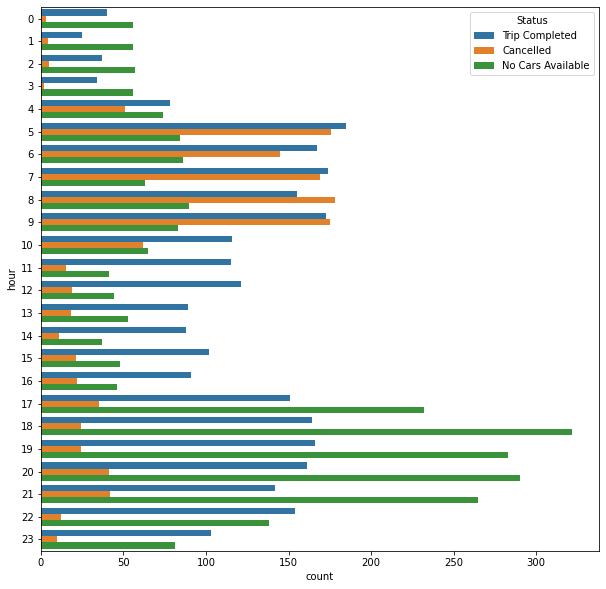

In [15]:

#plotting status of trips in the dataset

plt.figure(figsize=(10,10))
sns.countplot(y='hour',data=d,hue='Status')
plt.show()

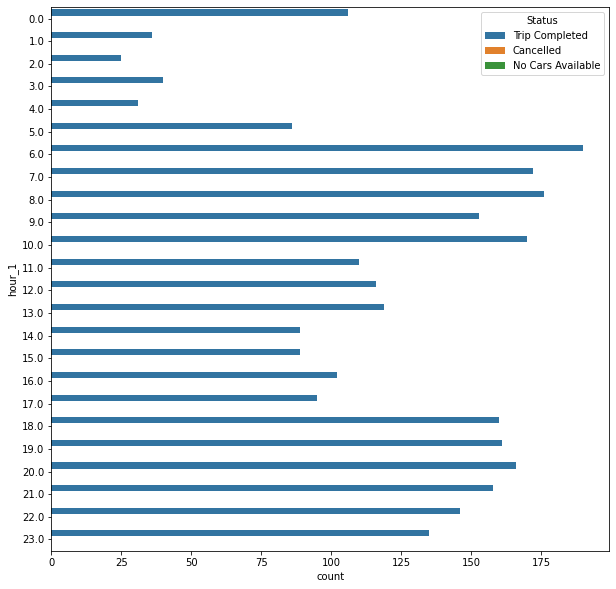

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(y='hour_1',data=d,hue='Status')
plt.show()

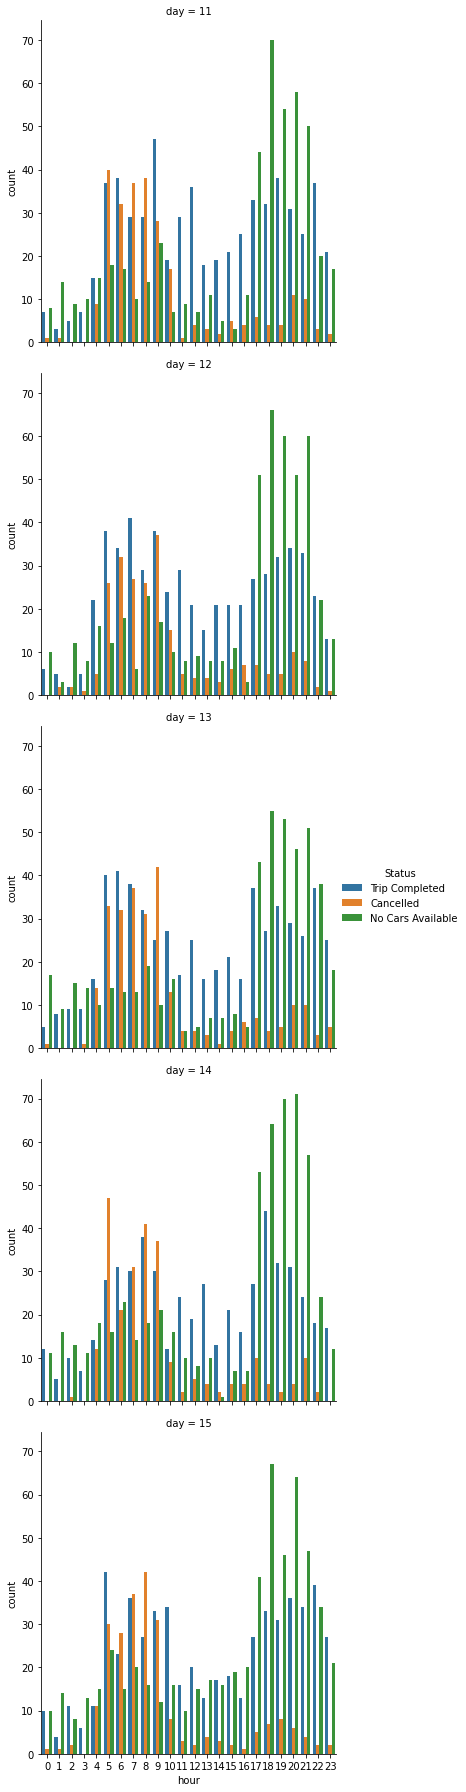

In [17]:
#plotting status of trips w.r.t to day

sns.catplot(x='hour',data=d,row='day',hue='Status',kind='count')
plt.show()

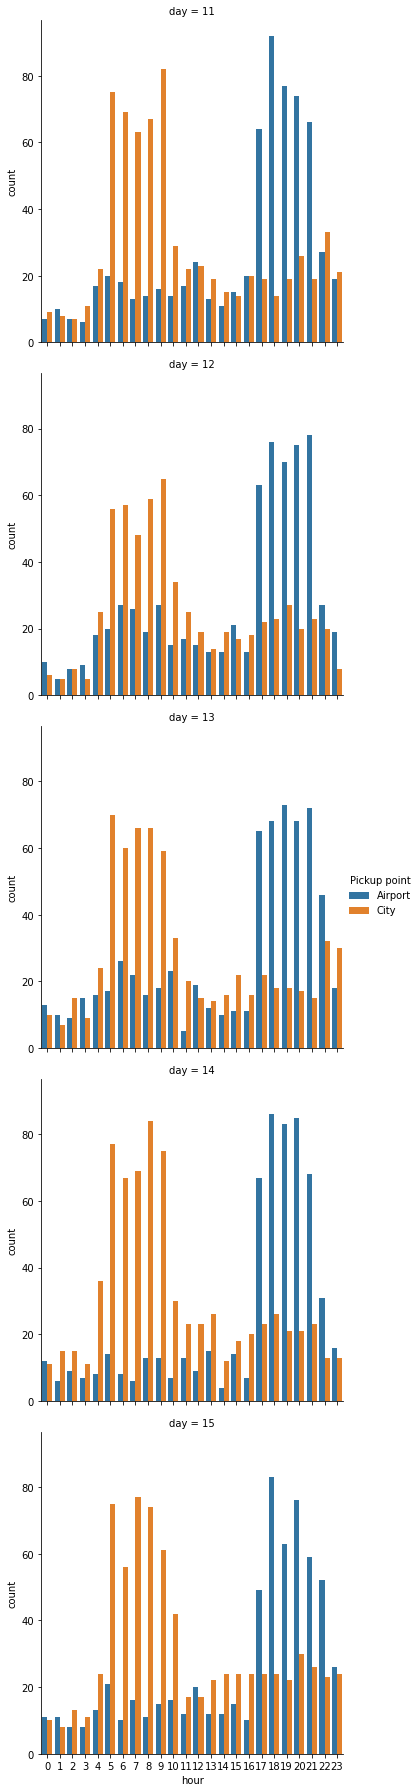

In [18]:
sns.catplot(x='hour',data=d,row='day',hue='Pickup point',kind='count')
plt.show()

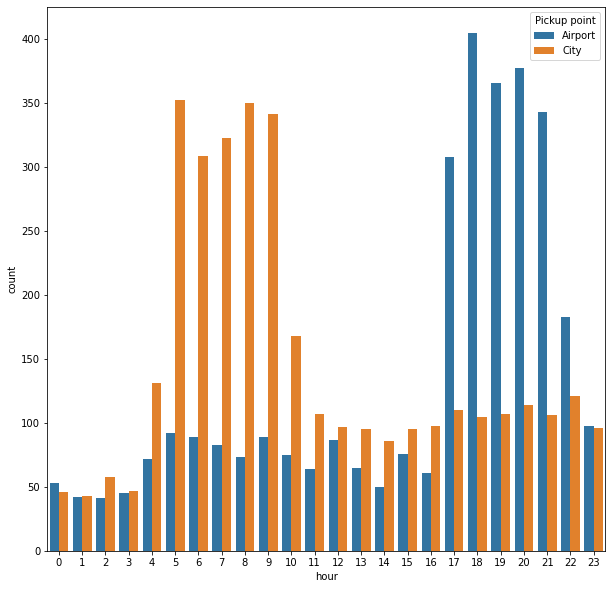

In [19]:
# plotting in particular hours pickup destinations

plt.figure(figsize=(10,10))
sns.countplot(x='hour',data=d,hue='Pickup point')
plt.show()

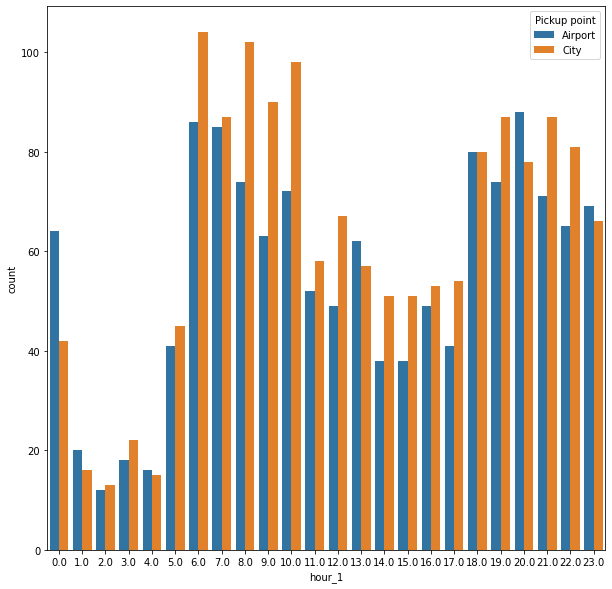

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='hour_1',data=d,hue='Pickup point')
plt.show()

In [21]:
d['slot']=0
d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,hour_1,day,day_1,slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,11,11.0,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,11,11.0,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,12,12.0,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,12,12.0,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,13,13.0,0


In [22]:
# to made it more understandble adding some slots 

i=0
for j in d['hour']:
    if d.iloc[i,6]<5:
        d.iloc[i,10]='premorning'
    elif 5>=d.iloc[i,6]<12:
        d.iloc[i,10]='morning'
    elif 12>=d.iloc[i,6]<16:
        d.iloc[i,10]='afternoon'
    elif 16>=d.iloc[i,6]<20:
        d.iloc[i,10]='evining'
    else:
         d.iloc[i,10]='night'
    i=i+1
   
d.head()       
        

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,hour_1,day,day_1,slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,11,11.0,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,11,11.0,night
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,12,12.0,afternoon
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,12,12.0,night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,13,13.0,afternoon


In [23]:
d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,hour_1,day,day_1,slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,11,11.0,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,11,11.0,night
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,12,12.0,afternoon
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,12,12.0,night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0,13,13.0,afternoon


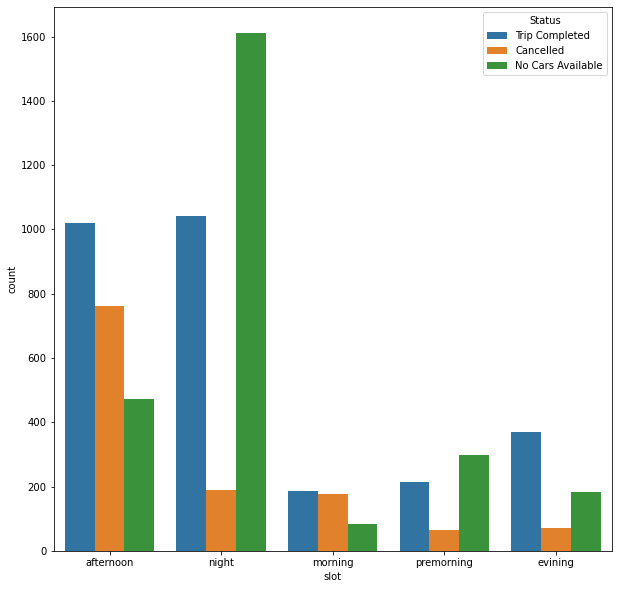

In [58]:
#status of trips in particular slots

plt.figure(figsize=(10,10))
sns.countplot(x='slot',data=d,hue='Status')
plt.show()

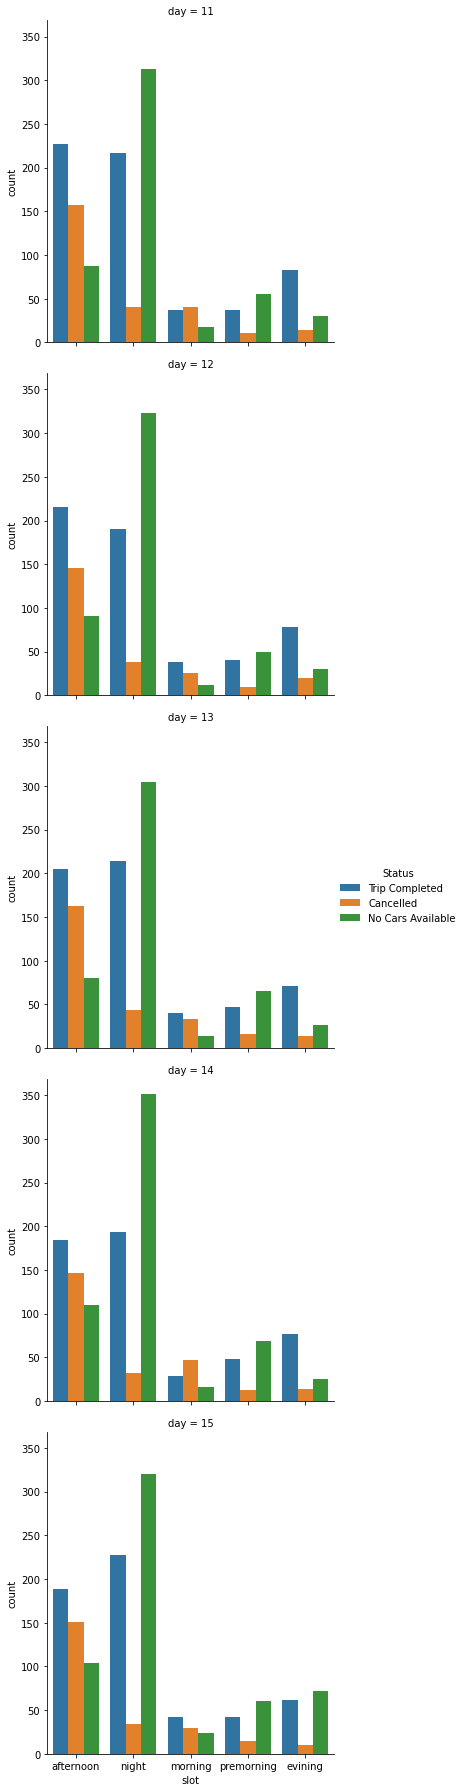

In [62]:
#status of trips in particular slots and days


sns.catplot(x='slot',data=d,row='day',hue='Status',kind='count')
plt.show()

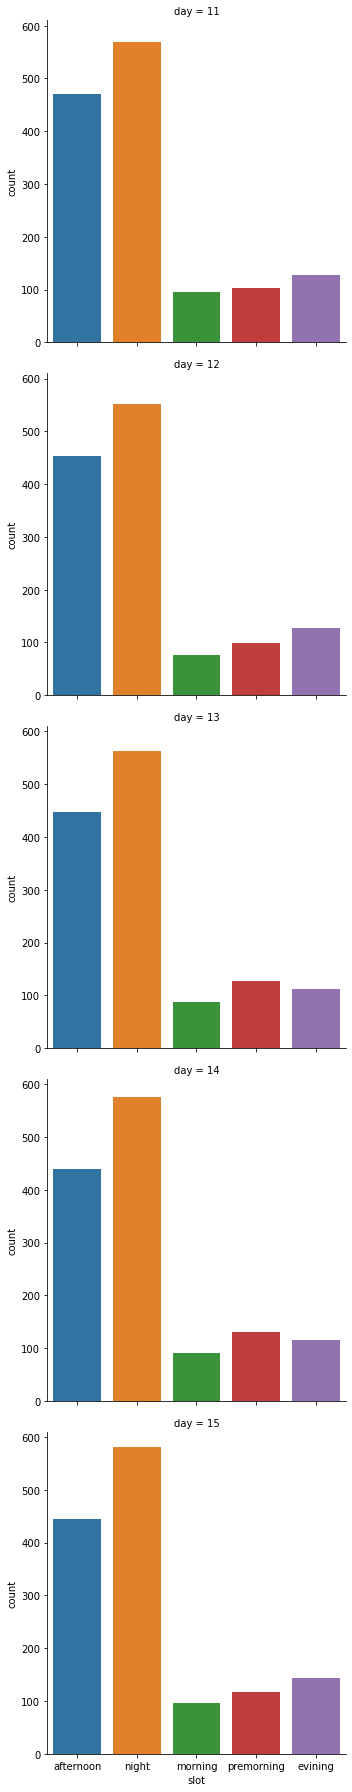

In [64]:
sns.catplot(x='slot',data=d,row='day',kind='count')
plt.show()

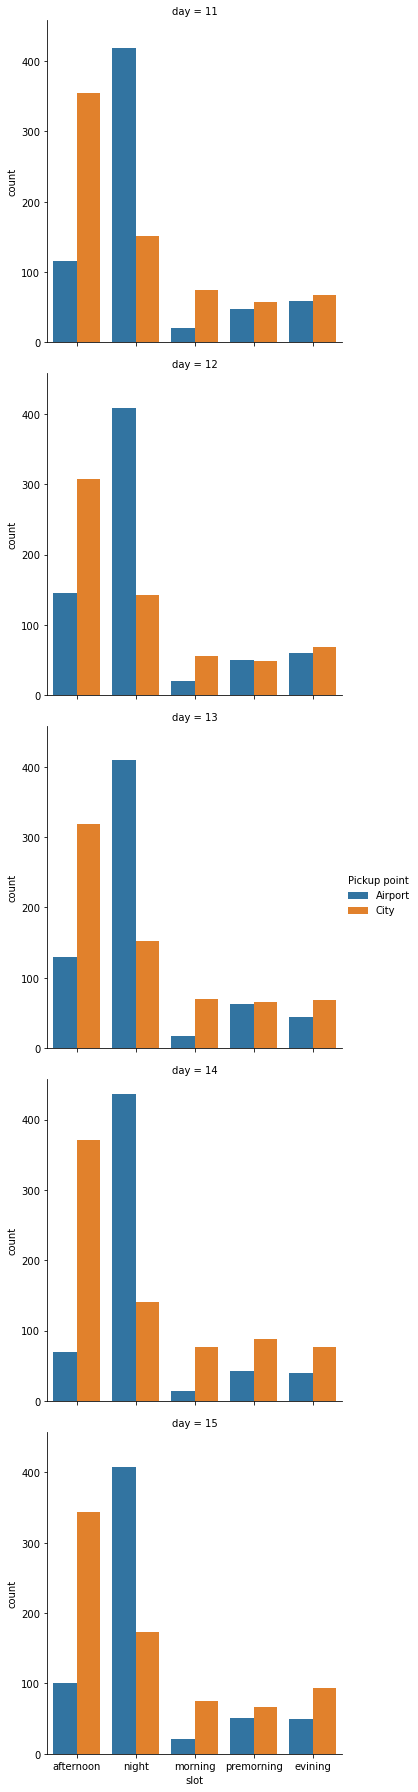

In [65]:
sns.catplot(x='slot',data=d,row='day',hue='Pickup point',kind='count')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Pickup point'>

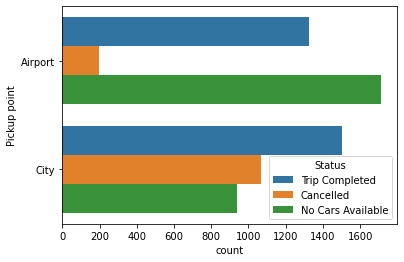

In [68]:
# status of trips at particulat pickupoints
morning=d[d['slot']=='morning']
sns.countplot(y='Pickup point',data=d,hue='Status')

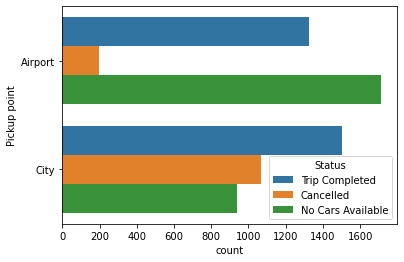

In [24]:
afternoon=d[d['slot']=='premorning']
sns.countplot(y='Pickup point',data=d,hue='Status')
plt.show()

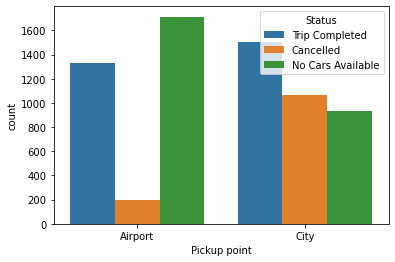

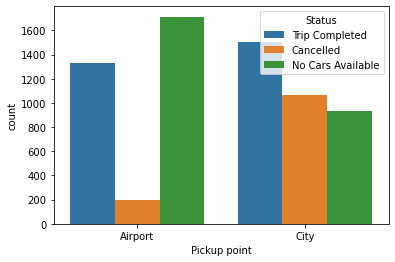

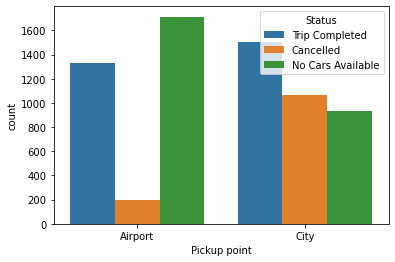

In [70]:
#pickups w.r.t to slots

afternoon=d[d['slot']=='afternoon']
sns.countplot(x='Pickup point',data=d,hue='Status')
plt.show()
afternoon=d[d['slot']=='evining']
sns.countplot(x='Pickup point',data=d,hue='Status')
plt.show()
afternoon=d[d['slot']=='night']
sns.countplot(x='Pickup point',data=d,hue='Status')
plt.show()

Conclusion

In our analysis of the Uber dataset, we delved into several significant aspects of rider behavior. The following key findings have emerged:

Popular Boarding Routes: We discovered that the route between Airport  and City is the most frequented route, witnessing the highest passenger boarding. This route appears to be a preferred choice among riders.

Peak Hour Insights: Our examination of the data unveiled that the busiest hours for Uber rides are typically observed between 6:00 AM and 10:00 AM and  6:00 PM and 8:00 PM during Night thter is huge demand for cabs. This information is vital for Uber's scheduling and resource allocation.

Preferred Destination Areas: Through catplots, it was evident that a majority of passengers opt forAirport, which stands out as the most common drop-off location. This indicates a significant rider preference for this particular area.

These findings provide valuable insights for Uber's operational strategies, enabling them to enhance their service and efficiency. Data-driven decision-making can further contribute to optimizing their services and ensuring better customer experiences.

It is important to acknowledge that these conclusions are drawn from the analysis of the dataset at hand. Rider behavior may evolve over time in response to changing circumstances, preferences, and urban dynamics. These insights should be considered as a foundation for future studies and ongoing improvements in Uber's services.

